In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import cohen_kappa_score
from itertools import product
from sklearn.cluster import AgglomerativeClustering
import skfuzzy as fuzz
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from jqmcvi import base
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Hard and Soft Clustering

In [8]:
items_similarity = pd.read_csv("./data/items_similarity.csv")
items_similarity = items_similarity.set_index('item_id')
# print(items_similarity.shape)
# items_similarity

## PCA

In [17]:
X_std = StandardScaler().fit_transform(items_similarity)
pca = decomposition.PCA(n_components=392)
features = pca.fit_transform(items_similarity)

## K-means Clustering

In [85]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 10000, n_init = 50, random_state = 2021)
y_kmeans_1_ = kmeans.fit_predict(features)

## Fuzzy Clustering

In [87]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(features.T, 10, 2, error=0.005, maxiter=1000, init=None,seed=2021)
cluster_membership = np.argmax(u, axis=0)

# Hierarchical Clustering

In [86]:
hc = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="average",random_state=2021)
y_hc = hc.fit_predict(features)

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [79]:
for i in range(0,ncluster):
    print(len(features[cluster_membership == i,:]))

683
70
0
91
4
16
155
2
1
62


In [78]:
ncluster

10

# Clustering Validation

In [88]:
# Kmeans
kmeans_dunn_index = []
kmeans_db_index = []     # Davies-Bouldin
kmeans_ch_index = []     # Calinski Harabasz
kmeans_sh_index = []   # silhouette_score
# Agglomerative Clustering
agglo_dunn_index = []
agglo_db_index = []     # Davies-Bouldin
agglo_ch_index = []     # Calinski Harabasz
agglo_sh_index = []   # silhouette_score
# Fuzzy clustering
fpcs = []
fuzzy_db_index = []     # Davies-Bouldin
fuzzy_ch_index = []     # Calinski Harabasz
fuzzy_sh_index = []   # silhouette_score

nbr_of_items = []
fuzzy_nbr_of_items = []
for ncluster in range(2,11):
    print(f"ncluster == {ncluster} ")
    # Clustering Method
    # ==> Kmeans
    kmeans = KMeans(n_clusters = ncluster, init = 'k-means++', max_iter = 10000, n_init = 50, random_state = 2021)
    y_kmeans = kmeans.fit_predict(features)
    # ==> Fuzzy
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(features.T, ncluster, 2, error=0.005, maxiter=1000, init=None,seed=2021)
    cluster_membership = np.argmax(u, axis=0)
    fpcs.append(fpc)
    # ==> Agglomerative Clustering
    hc = AgglomerativeClustering(n_clusters=ncluster,affinity="euclidean",linkage="average")
    y_hc = hc.fit_predict(features)
    # Validity index
    # ==> Dunn Index
    #                   Kmeans Clusters, Fuzzy Clusters, Agglomerative Clusters   all for Dunn index
    kmeans_clusters = []
    agglo_clusters = []
    items_vals = []
    fuzzy_items_vals = []
    for i in range(0,ncluster):
        items_vals.append(len(features[y_kmeans == i,:]))
        items_vals.append(len(features[y_hc == i,:]))
        fuzzy_items_vals.append(len(features[cluster_membership == i,:]))
        kmeans_clusters.append(features[y_kmeans == i,:])
        agglo_clusters.append(features[y_hc == i,:])
    # hard
    min_items = min(items_vals)
    max_items = max(items_vals)
    items_range = f"{min_items} ~ {max_items}"
    nbr_of_items.append(items_range)
    # Soft
    fuzzy_min_items = min(fuzzy_items_vals)
    fuzzy_max_items = max(fuzzy_items_vals)
    fuzzy_items_range = f"{fuzzy_min_items} ~ {fuzzy_max_items}"
    fuzzy_nbr_of_items.append(fuzzy_items_range)
    #     
    kmeans_dunn_index.append(base.dunn(kmeans_clusters))
    agglo_dunn_index.append(base.dunn(agglo_clusters))
    #fuzzy_dunn_index.append(base.dunn(fuzzy_clusters))
    # ==> Davies-Bouldin
    kmeans_db_index.append(davies_bouldin_score(features, y_kmeans))
    agglo_db_index.append(davies_bouldin_score(features, y_hc))
    fuzzy_db_index.append(davies_bouldin_score(features, cluster_membership))
    # ==> Calinski Harabasz
    kmeans_ch_index.append(calinski_harabasz_score(features, y_kmeans))
    agglo_ch_index.append(calinski_harabasz_score(features, y_hc))
    fuzzy_ch_index.append(calinski_harabasz_score(features, cluster_membership))
    # ==> Silhouette Score
    kmeans_sh_index.append(silhouette_score(features, y_kmeans))
    agglo_sh_index.append(silhouette_score(features, y_hc))
    fuzzy_sh_index.append(silhouette_score(features, cluster_membership))

ncluster == 2 
ncluster == 3 
ncluster == 4 
ncluster == 5 
ncluster == 6 
ncluster == 7 
ncluster == 8 
ncluster == 9 
ncluster == 10 


## Indice de Dunn

In [89]:
print("Hard Nombre Items in cluster")
print(f"==> {nbr_of_items} ")
print("Soft Nombre Items in cluster")
print(f"==> {fuzzy_nbr_of_items} ")
print("Kmeans")
print(f"==> Dunn index = {kmeans_dunn_index} ")
print(f"==> DB index   = {kmeans_db_index} ")
print(f"==> CH index   = {kmeans_ch_index} ")
print(f"==> SH index   = {kmeans_sh_index} ")
print("Agglomerative Clustering")
print(f"==> Dunn index = {agglo_dunn_index} ")
print(f"==> DB index   = {agglo_db_index} ")
print(f"==> CH index   = {agglo_ch_index} ")
print(f"==> SH index   = {agglo_sh_index} ")
print("Fuzzy")
print(f"==> FPC Score = {fpcs} ")
print(f"==> DB index   = {fuzzy_db_index} ")
print(f"==> CH index   = {fuzzy_ch_index} ")
print(f"==> SH index   = {fuzzy_sh_index} ")

Hard Nombre Items in cluster
==> ['297 ~ 787', '68 ~ 719', '2 ~ 719', '1 ~ 716', '1 ~ 716', '1 ~ 716', '1 ~ 716', '1 ~ 716', '1 ~ 666'] 
Soft Nombre Items in cluster
==> ['308 ~ 776', '71 ~ 705', '12 ~ 764', '2 ~ 767', '0 ~ 767', '17 ~ 706', '2 ~ 726', '0 ~ 705', '0 ~ 732'] 
Kmeans
==> Dunn index = [0.4274975864583405, 0.5137691513917191, 0.5066669290237126, 0.4710785501848566, 0.46167612367366273, 0.4209132702750784, 0.454985197641005, 0.38057321758516494, 0.3725296400040106] 
==> DB index   = [0.5862372580517956, 1.050464542908583, 1.2165230088334433, 1.2748949751982852, 1.2980163531509397, 1.3931481273561788, 1.2877092500104932, 1.3294093358901435, 1.4740717661683291] 
==> CH index   = [2413.7395816616727, 1451.7010725236448, 1125.913191053882, 937.1987211021222, 809.7554146159384, 702.5792138177408, 625.5645524944606, 566.4097549712917, 527.0534624388644] 
==> SH index   = [0.6209039395298641, 0.4385144979536209, 0.376373898893076, 0.3063317323827923, 0.2951490142141461, 0.27548747

In [ ]:
1084 & 2 & 0.5704 & 0.5766 & 2368.3262 & 0.6203 & 297  787

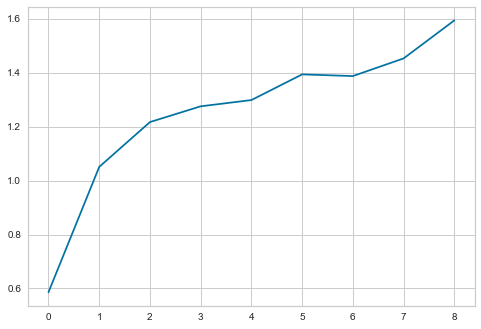

In [42]:
plt.plot(kmeans_db_index)

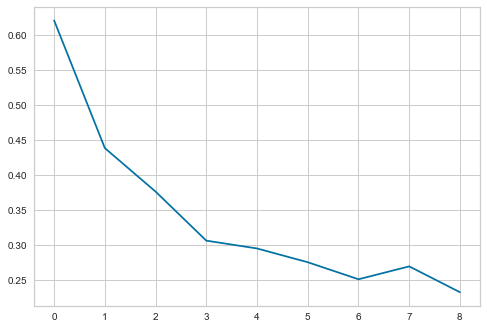

In [43]:
plt.plot(kmeans_sh_index)

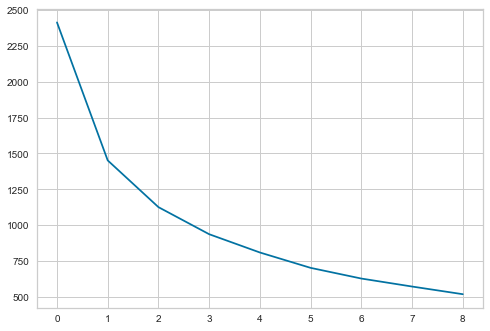

In [44]:
plt.plot(kmeans_ch_index)

In [30]:
# We store the clusters
from jqmcvi import base
# Kmeans Clusters
kmeans_clus0 = features[y_kmeans_1_ == 0,:]
kmeans_clus1 = features[y_kmeans_1_ == 1,:]
kmeans_clusters = [kmeans_clus0, kmeans_clus1]
# Hierarchical Clusters
agglo_clus0 = features[y_hc == 0,:]
agglo_clus1 = features[y_hc == 1,:]
agglo_clusters = [agglo_clus0, agglo_clus1]
# Fuzzy Clusters
fuzzy_clus0 = features[cluster_membership == 0,:]
fuzzy_clus1 = features[cluster_membership == 1,:]
fuzzy_clusters = [fuzzy_clus0, fuzzy_clus1]
  
print(f"Kemans ==> {base.dunn(kmeans_clusters)} ")
print(f"Agglo ==> {base.dunn(agglo_clusters)}")
print(f"Fuzzy ==> {base.dunn(fuzzy_clusters)}")

Kemans ==> 0.4274975864583405 
Agglo ==> 1.0930373854700701


ValueError: zero-size array to reduction operation minimum which has no identity

## Indice Davies-Bouldin

In [31]:
print(f"Kemans ==> {davies_bouldin_score(features, y_kmeans_1_)}")
print(f"Agglo ==> {davies_bouldin_score(features, y_hc)}")
print(f"Fuzzy ==> {davies_bouldin_score(features, cluster_membership)}")

Kemans ==> 0.5862372580517956
Agglo ==> 0.8028670898196171
Fuzzy ==> 1.9847791705544557


# Indice Calinski Harabasz

In [32]:
print(f"Kemans ==> {calinski_harabasz_score(features, y_kmeans_1_)}")
print(f"Agglo ==> {calinski_harabasz_score(features, y_hc)}")
print(f"Fuzzy ==> {calinski_harabasz_score(features, cluster_membership)}")

Kemans ==> 2413.7395816616727
Agglo ==> 434.58023855683837
Fuzzy ==> 543.8918021322005


## silhouette_score

In [33]:
# Comparaison of models
print(f'hierarchical clustering ==> Silhouette Score(n=2): {silhouette_score(features, y_hc)}')
print(f'kmeans clustering ==> Silhouette Score(n=2): {silhouette_score(features, y_kmeans_1_)}')
print(f'fuzzy clustering ==> Silhouette Score(n=2): {silhouette_score(features,cluster_membership)}')
# ==> Enfin, la partition avec le SI le plus élevé est considérée comme optimale

hierarchical clustering ==> Silhouette Score(n=2): 0.3520700326801363
kmeans clustering ==> Silhouette Score(n=2): 0.6209039395298641
fuzzy clustering ==> Silhouette Score(n=2): 0.20297671838134623
